In [4]:
from PIL import Image, ImageDraw
import math
import numpy as np

# Checkerboard

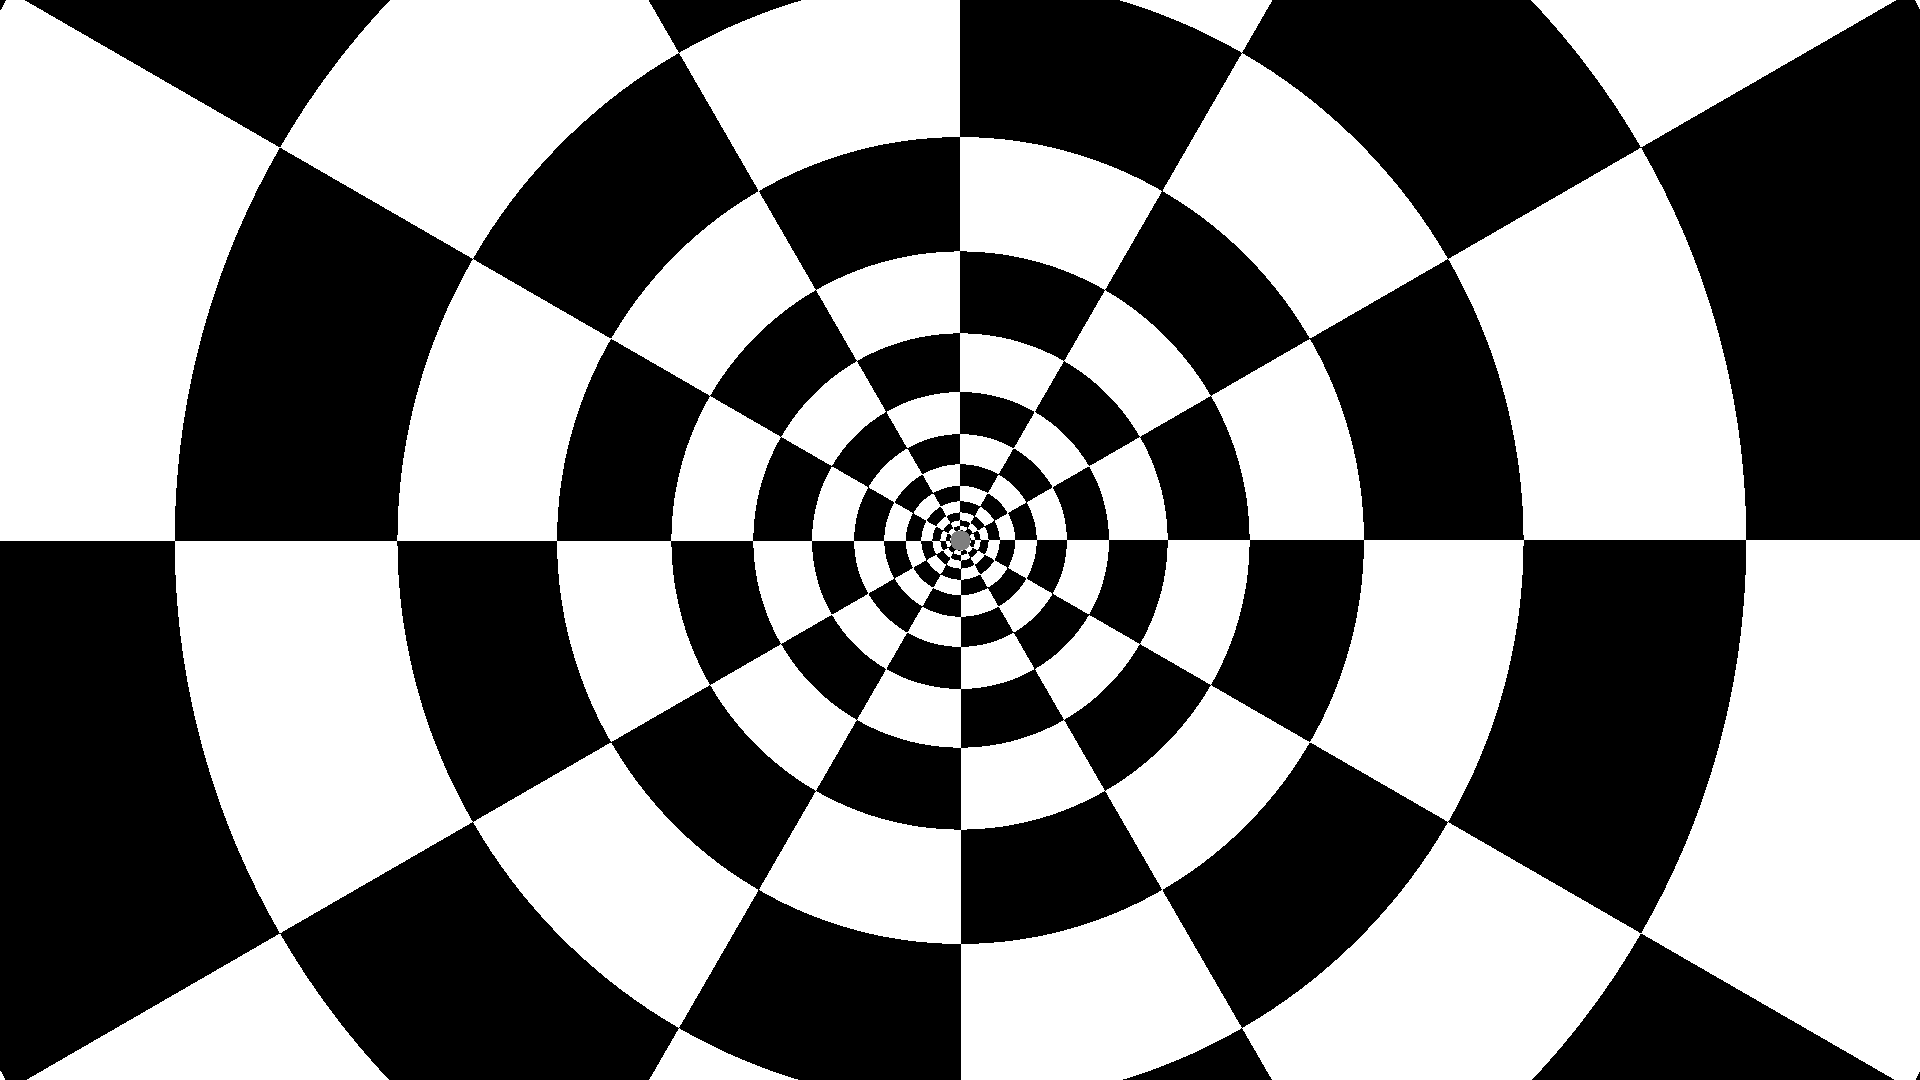

In [ ]:

width = 1920
height = 1080

k = 3  
angle_spacing = 30 

r0 = 10

#color_map = [[(0,0,0),(255,255,255)],[(255,255,255),(0,0,0)]] # 1
color_map = [[(255,255,255),(0,0,0)],[(0,0,0),(255,255,255)]] # 2

x = np.arange(width)
y = np.arange(height)
xx, yy = np.meshgrid(x, y)

center = (width//2, height//2) 
dx = xx - center[0]
dy = yy - center[1]
r = np.sqrt(dx**2 + dy**2)
theta = np.degrees(np.arctan2(dy, dx)) % 360  

mask = r > r0

img_array = np.full((height, width, 3), 127, dtype=np.uint8)

if np.any(mask):
    valid_r = r[mask]
    valid_theta = theta[mask]
    
    r_index = (np.floor(k * np.log(valid_r))) % 2
    r_index = r_index.astype(int)
    
    theta_index = (valid_theta // angle_spacing) % 2
    theta_index = theta_index.astype(int)
    
    color_map_np = np.array(color_map, dtype=np.uint8)
    img_array[mask] = color_map_np[r_index, theta_index]

img = Image.fromarray(img_array)
display(img)

img.save("checkerboard_2.png")

# Fixation

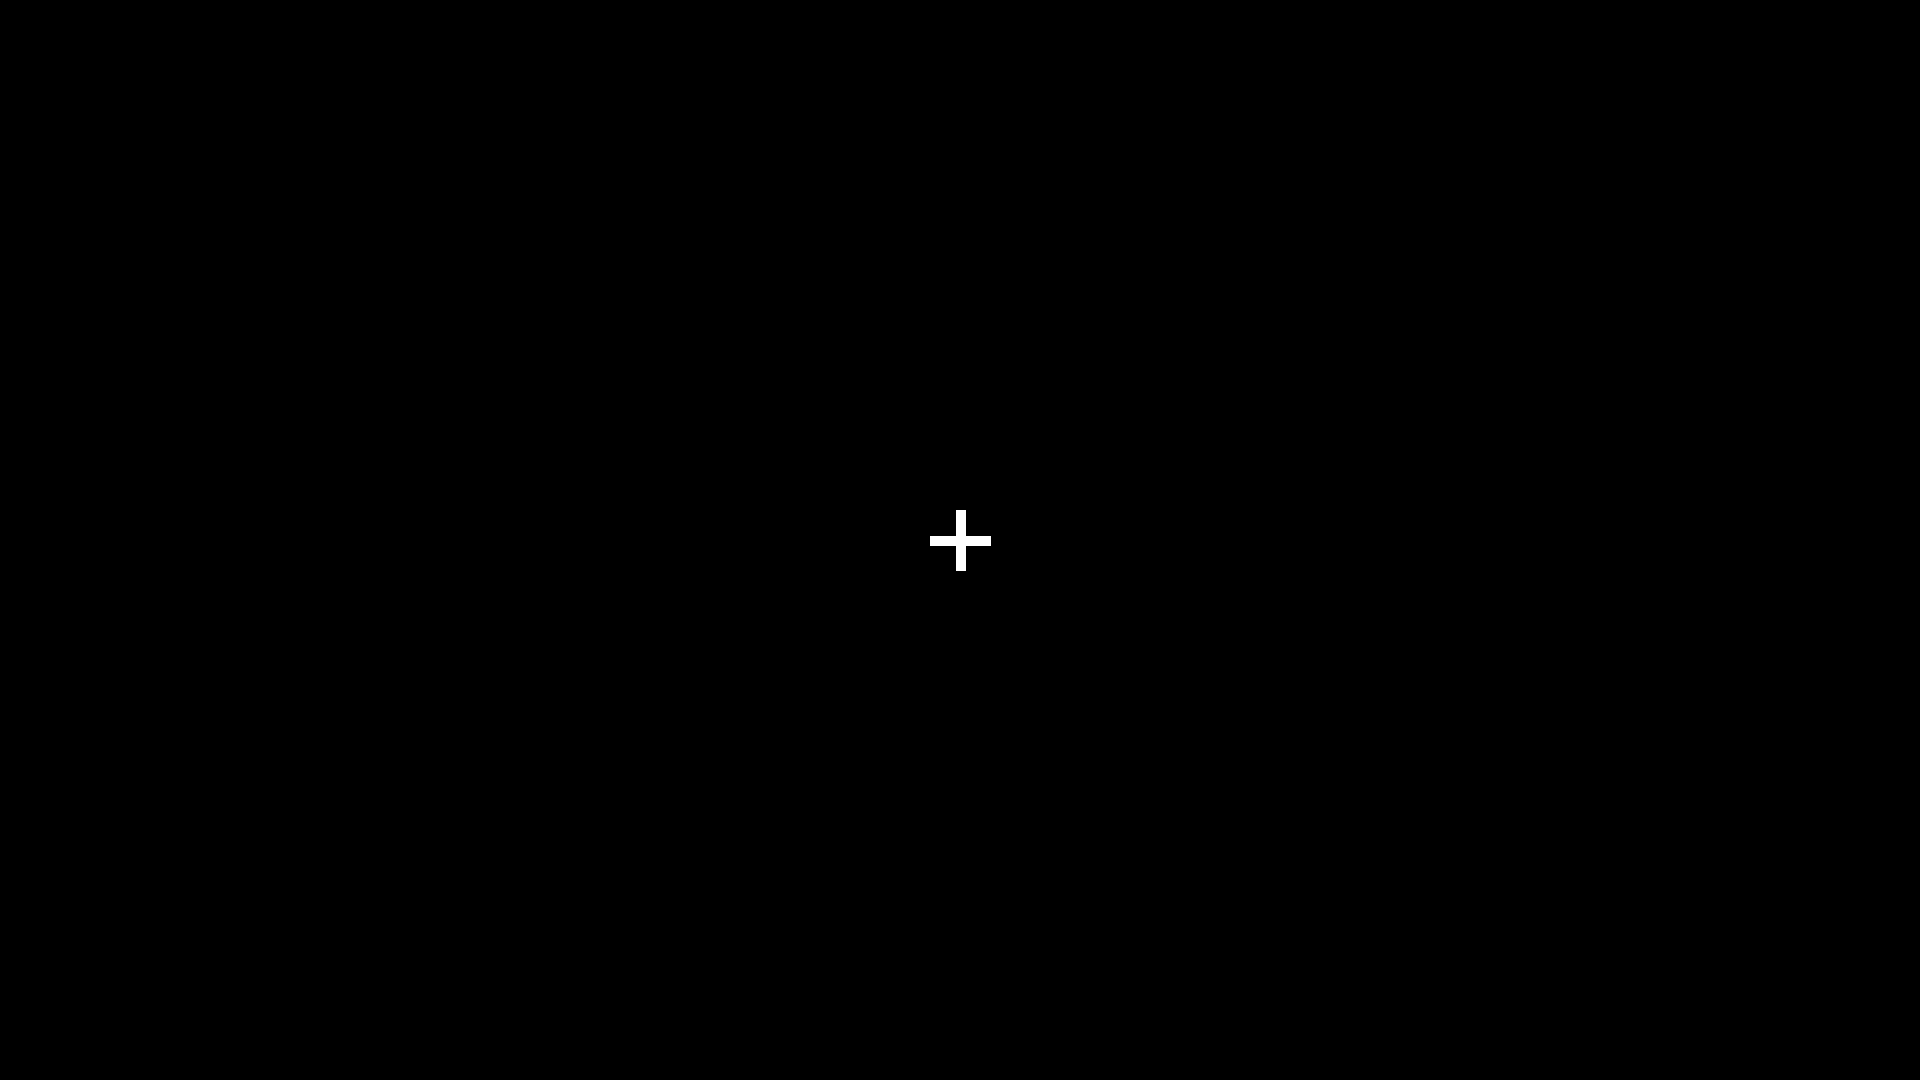

In [ ]:

width = 1920
height = 1080

center = (width//2, height//2) 

radius = 30

img = Image.new('RGB', (width, height), color=(0, 0, 0)) 
draw = ImageDraw.Draw(img)

draw.line([(center[0], center[1] - radius), (center[0], center[1] + radius)], fill='white', width=10)
draw.line([(center[0] - radius, center[1]), (center[0] + radius, center[1])], fill='white', width=10)

display(img)

img.save("cross.png") 